In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def indentify_outliers (dataframe, fea_in):
    outliers = set()
    for i in fea_in:

        Q1 = np.percentile(dataframe[i], 25)
        Q3 = np.percentile(dataframe[i],75)
        IQR = Q3 - Q1

        upper_bound = list(np.where(dataframe[i] >= (Q3+1.5*IQR)))
        lower_bound = list(np.where(dataframe[i] <= (Q1-1.5*IQR)))

        for u in upper_bound:
            outliers.update(u)
        for l in lower_bound:
            outliers.update(l)
    return outliers

In [3]:
pd.set_option('display.max_rows', None)

In [5]:
data_read = pd.read_csv("https://www.dropbox.com/s/9kwyyami2vzg56r/creditcard.csv?dl=1")
data_read = data_read.drop(["Time"], axis = 1)

In [6]:
X = data_read.drop(["Class"], axis = 1)
y = data_read[["Class"]]
print("Number of features in the dataset:", X.shape[1])

Number of features in the dataset: 29


Text(0.5, 1.0, 'Class count of the dataset')

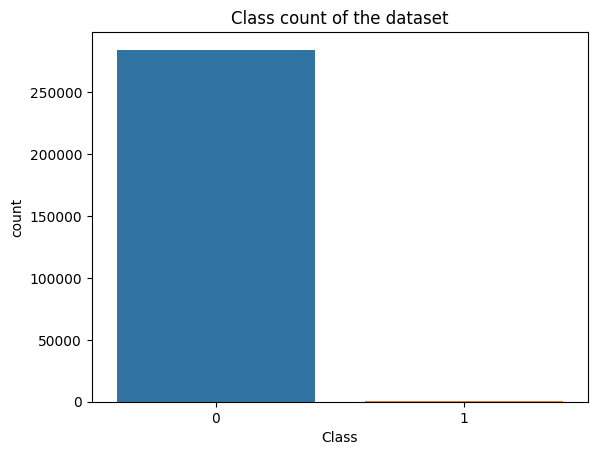

In [7]:
sns.countplot(x = data_read["Class"])
plt.title("Class count of the dataset")

In [8]:
data_read.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print(data_read.isna().sum())

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
print("Number of data points of class 0:", sum(y["Class"] == 0))
print("Number of data points of class 1:", sum(y["Class"] == 1))

Number of data points of class 0: 284315
Number of data points of class 1: 492


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
df_train = pd.concat([X_train, y_train], axis=1)
data_class0 = df_train[df_train["Class"] == 0]
data_class1 = df_train[df_train["Class"] == 1]
num_data_class1 = data_class1.shape[0]

In [13]:
print("Number of data points of class 0 in training dataset:", data_class0.shape[0])
print("Number of data points of class 1 in training dataset:", data_class1.shape[0])
print("Number of data points of class 0 in test dataset:", sum(y_test["Class"] == 0))
print("Number of data points of class 1 in test dataset:", sum(y_test["Class"] == 1))

Number of data points of class 0 in training dataset: 199019
Number of data points of class 1 in training dataset: 345
Number of data points of class 0 in test dataset: 85296
Number of data points of class 1 in test dataset: 147


In [14]:
correlation = data_read.corr()
correlation.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974


<Axes: >

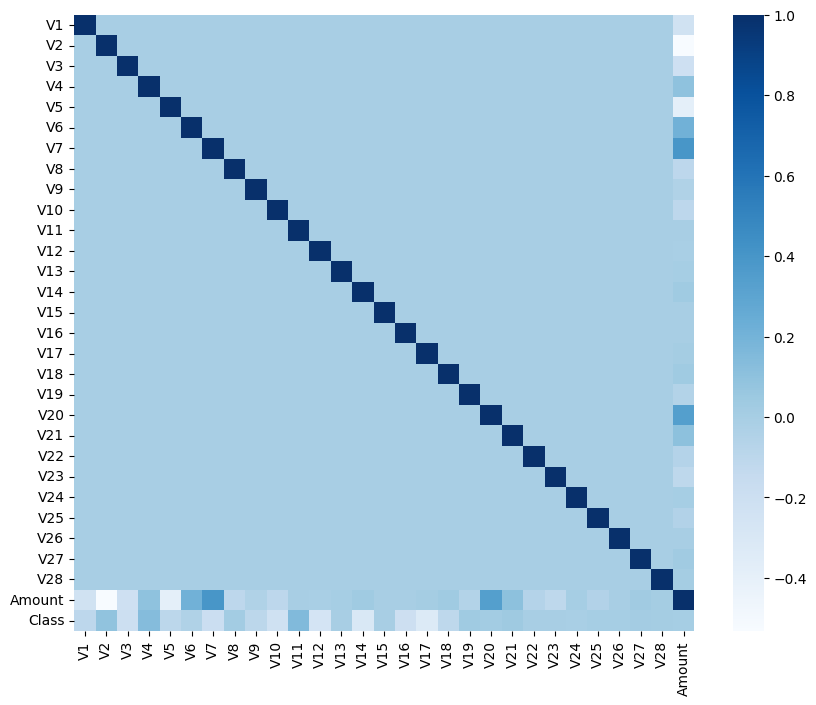

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data_read.corr().drop(['Class'],axis=1), cmap='Blues', annot = False)

<Axes: >

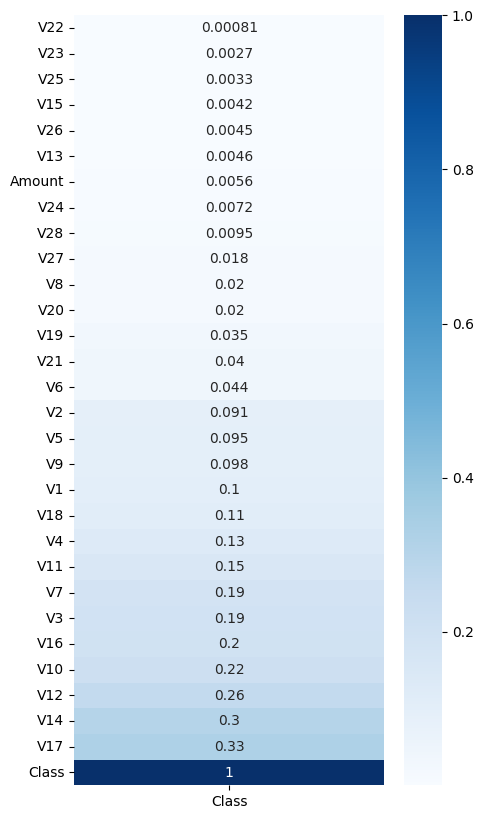

In [16]:
sorted_mat = data_read.corr().abs()[['Class']].sort_values('Class')
plt.figure(figsize=(5,10))
sns.heatmap(data_read.corr().abs()[['Class']].sort_values('Class'), cmap='Blues', annot = True)

In [17]:
data_class0_sampled_outliers = data_class0.sample(n = num_data_class1 * 20, replace = False, random_state = 1)

In [19]:
features_outliers = sorted_mat.index[0:10]
features_outliers = features_outliers.values.tolist()
print(features_outliers)

['V22', 'V23', 'V25', 'V15', 'V26', 'V13', 'Amount', 'V24', 'V28', 'V27']


In [20]:
data_class0_copy = data_class0.reset_index()
outliers = indentify_outliers(data_class0_copy, features_outliers)
data_class0_copy.drop(outliers, inplace = True)
del data_class0_copy['index']
data_class0_sampled_no_outliers = data_class0_copy.sample(n = num_data_class1 * 20, replace = False, random_state = 1)

In [21]:
data_merged_outliers = pd.concat([data_class0_sampled_outliers, data_class1], axis=0)
data_merged_shuffled_outliers = data_merged_outliers.sample(random_state = 1, frac=1).reset_index(drop=True)

In [22]:
data_merged_no_outliers = pd.concat([data_class0_sampled_no_outliers, data_class1], axis=0)
data_merged_shuffled_no_outliers = data_merged_no_outliers.sample(random_state = 1, frac=1).reset_index(drop=True)

In [23]:
print("Number of data points of class 0 in downsampled training dataset:", data_class0_sampled_outliers.shape[0])
print("Number of data points of class 1 in downsampled training dataset:", data_class1.shape[0])

Number of data points of class 0 in downsampled training dataset: 6900
Number of data points of class 1 in downsampled training dataset: 345


Text(0.5, 1.0, 'Class count of the dataset after downsampling')

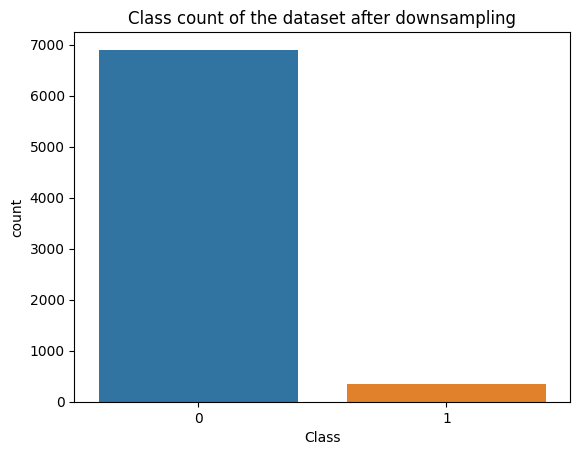

In [24]:
sns.countplot(x = data_merged_outliers["Class"])
plt.title("Class count of the dataset after downsampling")

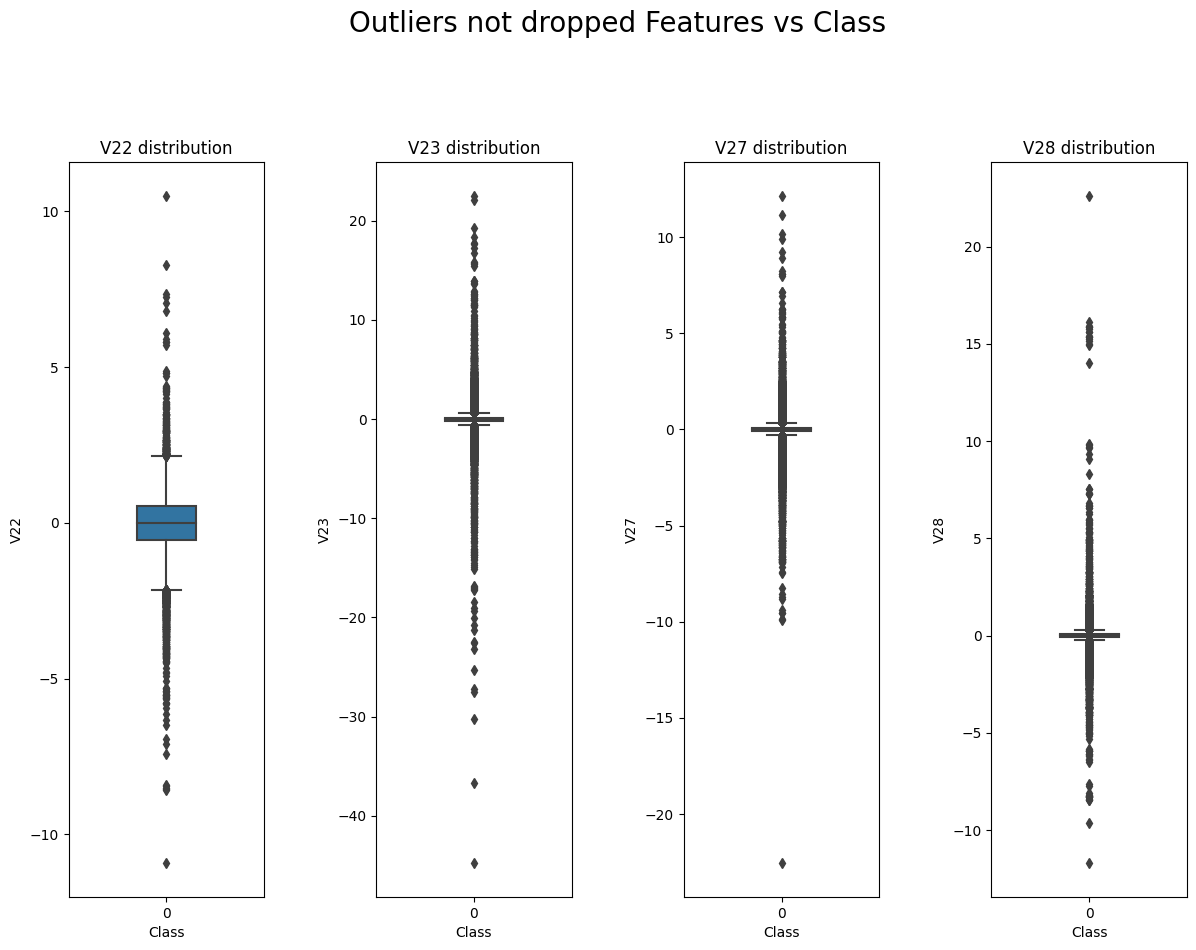

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,10))
fig.suptitle('Outliers not dropped Features vs Class', size = 20)
fig.tight_layout(pad=5.0)
sns.boxplot(ax=axes[0], data=data_class0, x='Class', y='V22', width=0.3)
axes[0].set_title("V22 distribution");
sns.boxplot(ax=axes[1], data=data_class0, x='Class', y='V23', width=0.3)
axes[1].set_title("V23 distribution");
sns.boxplot(ax=axes[2], data=data_class0, x='Class', y='V27', width=0.3)
axes[2].set_title("V27 distribution");
sns.boxplot(ax=axes[3], data=data_class0, x='Class', y='V28', width=0.3)
axes[3].set_title("V28 distribution");
plt.show()

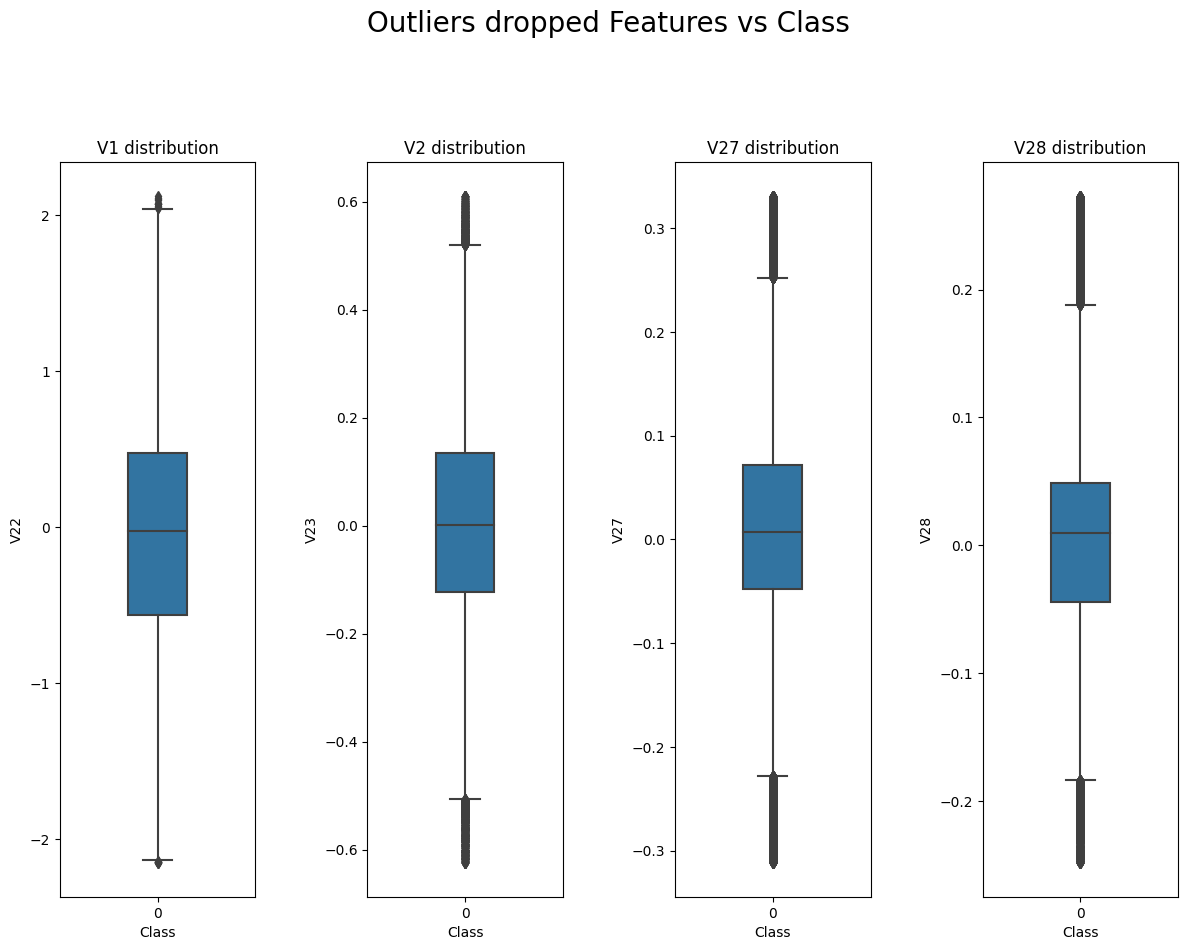

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,10))
fig.suptitle('Outliers dropped Features vs Class', size = 20)
fig.tight_layout(pad=5.0)
sns.boxplot(ax=axes[0], data=data_class0_copy, x='Class', y='V22', width=0.3)
axes[0].set_title("V1 distribution");
sns.boxplot(ax=axes[1], data=data_class0_copy, x='Class', y='V23', width=0.3)
axes[1].set_title("V2 distribution");
sns.boxplot(ax=axes[2], data=data_class0_copy, x='Class', y='V27', width=0.3)
axes[2].set_title("V27 distribution");
sns.boxplot(ax=axes[3], data=data_class0_copy, x='Class', y='V28', width=0.3)
axes[3].set_title("V28 distribution");
plt.show()

In [27]:
X_ds_outliers = data_merged_shuffled_outliers.drop(["Class"], axis = 1)
y_ds_outliers = data_merged_shuffled_outliers[["Class"]]

X_ds_no_outliers = data_merged_shuffled_no_outliers.drop(["Class"], axis = 1)
y_ds_no_outliers = data_merged_shuffled_no_outliers[["Class"]]

In [28]:
rs = preprocessing.RobustScaler()

X_train = rs.fit_transform(X_train)
y_train = y_train.to_numpy()

X_ds_outliers = rs.fit_transform(X_ds_outliers)
y_ds_outliers = y_ds_outliers.to_numpy()

X_ds_no_outliers = rs.fit_transform(X_ds_no_outliers)
y_ds_no_outliers = y_ds_no_outliers.to_numpy()

X_test = rs.fit_transform(X_test)
y_test = y_test.to_numpy()

In [29]:
cross_val_split = 5
k_value = 6
rnd_frst_est = 30
kf = KFold(n_splits = cross_val_split, shuffle=True, random_state = 1)

In [30]:
def train_model_no_cross_val(model, X_loop, y_loop):
    time_exe = []
    for model_loop in model:
        t_beg = time.time()
        model_loop.fit(X_loop, y_loop)
        t_end = time.time()
        time_exe.append(t_end-t_beg)
    return time_exe

In [31]:
knn_model0 = KNeighborsClassifier(n_neighbors=k_value, weights = 'distance')
decision_tree_model0= tree.DecisionTreeClassifier(random_state = 1)
logistic_model0 = LogisticRegression(penalty = 'l2', solver = 'liblinear',random_state = 1)

models_to_train0 = [knn_model0,logistic_model0, decision_tree_model0]
models_comp_set_train_time = train_model_no_cross_val(models_to_train0, X_train, y_train)

In [32]:
def prediction_of_model(model, X_to_test, y_of_test):
    
    accuracy_list = []
    auc_score_list = []
    acc_class1_list = []
    acc_class0_list = []
    fpr_list = []
    tpr_list = []
    conf_mat = []
    
    for model_loop in model:
        y_pred = model_loop.predict(X_to_test)
        y_prob = model_loop.predict_proba(X_to_test)[:, 1]
        
        accuracy_list.append(accuracy_score(y_of_test, y_pred))
        auc_score_list.append(roc_auc_score(y_of_test, y_prob))
        fpr, tpr, _ = roc_curve(y_of_test, y_prob)
        
        cf = confusion_matrix(y_of_test, y_pred)
        acc_class1 = cf[1,1] / np.sum(cf[1,:])
        acc_class0 = cf[0,1] / np.sum(cf[0,:])
        
        conf_mat.append(cf)
        acc_class1_list.append(acc_class1)
        acc_class0_list.append(acc_class0)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    return ( accuracy_list, auc_score_list, acc_class1_list, acc_class0_list, conf_mat, fpr_list, tpr_list)

In [33]:
def train_model_cross_val(kf_used, models, X_loop, y_loop):
    time_exe = []
    for model_loop in models:
        fold = 0
        print("model being trained:", model_loop)
        t_beg = time.time()
        for train_index, val_index in kf.split(X_loop, y_loop):
            X_tr = X_loop[train_index]
            y_tr = y_loop[train_index]

            X_val = X_loop[val_index]
            y_val= y_loop[val_index]
            
            model_loop.fit(X_tr, y_tr)
                        
            y_pred= model_loop.predict(X_val)
            y_prob = model_loop.predict_proba(X_val)[:, 1]
            accuracy = accuracy_score(y_val, y_pred)
            auc_score = roc_auc_score(y_val, y_prob)


            print(f"========== FOLD {fold} ==========")
            print("Accuracy of model:", accuracy)
            print("AUC score of model:", auc_score)

            fold += 1
        t_end = time.time()
        time_exe.append(t_end - t_beg)
        print(" ")
    return time_exe

In [34]:
def train_model_cross_val_svc(kf_used, model_loop, X_loop, y_loop):
    print("model being trained:", model_loop)
    t_beg = time.time()
    for train_index, val_index in kf.split(X_loop, y_loop):
        X_tr = X_loop[train_index]
        y_tr = y_loop[train_index]

        X_val = X_loop[val_index]
        y_val= y_loop[val_index]

        model_loop.fit(X_tr, y_tr)
                        
        y_pred= model_loop.predict(X_val)
        y_prob = model_loop._predict_proba_lr(X_val)[:, 1]
        accuracy = accuracy_score(y_val, y_pred)
        auc_score = roc_auc_score(y_val, y_prob)


        print(f"========== FOLD {fold} ==========")
        print("Accuracy of model:", accuracy)
        print("AUC score of model:", auc_score)

        fold += 1
    return (t_end - t_beg)

In [35]:
knn_model1 = KNeighborsClassifier(n_neighbors=k_value, weights = 'distance')
logistic_model1 = LogisticRegression(penalty  = 'l2', solver = 'liblinear', random_state = 1)
decision_tree_model1= tree.DecisionTreeClassifier(random_state = 1)
models_to_train1 = [knn_model1, logistic_model1, decision_tree_model1]
model_outliers_train_time = train_model_cross_val(kf, models_to_train1, X_ds_outliers, y_ds_outliers)

model being trained: KNeighborsClassifier(n_neighbors=6, weights='distance')
========== FOLD 0 ==========
Accuracy of model: 0.9930986887508627
AUC score of model: 0.9481042163058115
========== FOLD 1 ==========
Accuracy of model: 0.9889579020013802
AUC score of model: 0.9432383292383293
========== FOLD 2 ==========
Accuracy of model: 0.9882677708764666
AUC score of model: 0.9505434255215915
========== FOLD 3 ==========
Accuracy of model: 0.9882677708764666
AUC score of model: 0.9217227898135948
========== FOLD 4 ==========
Accuracy of model: 0.9944789510006902
AUC score of model: 0.9388001463236191
 
model being trained: LogisticRegression(random_state=1, solver='liblinear')
========== FOLD 0 ==========
Accuracy of model: 0.9924085576259489
AUC score of model: 0.9869159846679789
========== FOLD 1 ==========
Accuracy of model: 0.9889579020013802
AUC score of model: 0.9575528255528256
========== FOLD 2 ==========
Accuracy of model: 0.9924085576259489
AUC score of model: 0.97602134885977

In [36]:
knn_model2 = KNeighborsClassifier(n_neighbors=k_value, weights = 'distance')
logistic_model2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', random_state = 1)
decision_tree_model2= tree.DecisionTreeClassifier(random_state = 1)
models_to_train2 = [knn_model2, logistic_model2, decision_tree_model2]
model_no_outliers_train_time = train_model_cross_val(kf, models_to_train2, X_ds_no_outliers, y_ds_no_outliers)

model being trained: KNeighborsClassifier(n_neighbors=6, weights='distance')
========== FOLD 0 ==========
Accuracy of model: 0.9958592132505176
AUC score of model: 0.9638609758624261
========== FOLD 1 ==========
Accuracy of model: 0.9910282953761215
AUC score of model: 0.9583587223587223
========== FOLD 2 ==========
Accuracy of model: 0.9937888198757764
AUC score of model: 0.9796943231441048
========== FOLD 3 ==========
Accuracy of model: 0.9910282953761215
AUC score of model: 0.939456120266972
========== FOLD 4 ==========
Accuracy of model: 0.9944789510006902
AUC score of model: 0.9484696988172174
 
model being trained: LogisticRegression(random_state=1, solver='liblinear')
========== FOLD 0 ==========
Accuracy of model: 0.9951690821256038
AUC score of model: 0.9879933699368073
========== FOLD 1 ==========
Accuracy of model: 0.9903381642512077
AUC score of model: 0.9799213759213758
========== FOLD 2 ==========
Accuracy of model: 0.9958592132505176
AUC score of model: 0.982911208151382

In [37]:
results_comp_set = prediction_of_model(models_to_train0, X_test, y_test)

In [38]:
results_outliers = prediction_of_model(models_to_train1, X_test, y_test)
results_no_outliers = prediction_of_model(models_to_train2, X_test, y_test)

In [39]:
num_miss_pred_class0_comp_set = []
num_miss_pred_class1_comp_set = []
total_miss_pred_comp_set = []

num_miss_pred_class0_outliers = []
num_miss_pred_class1_outliers = []
total_miss_pred_outliers = []

num_miss_pred_class0_no_outliers = []
num_miss_pred_class1_no_outliers = []
total_miss_pred_no_outliers = []

for i in range(len(results_comp_set[4][:])):
    cf = results_comp_set[4][i]
    num_miss_pred_class0_comp_set.append(cf[0][1])
    num_miss_pred_class1_comp_set.append(cf[1][0])
    total_miss_pred_comp_set.append(cf[0][1]+cf[1][0])
for i in range(len(results_outliers[4][:])):
    cf = results_outliers[4][i]
    num_miss_pred_class0_outliers.append(cf[0][1])
    num_miss_pred_class1_outliers.append(cf[1][0])
    total_miss_pred_outliers.append(cf[0][1]+cf[1][0])
for i in range(len(results_no_outliers[4][:])):
    cf = results_no_outliers[4][i]
    num_miss_pred_class0_no_outliers.append(cf[0][1])
    num_miss_pred_class1_no_outliers.append(cf[1][0])
    total_miss_pred_no_outliers.append(cf[0][1]+cf[1][0])

In [40]:
# you will need to add your algo name here
algo_names = ["KNeighborsClassifier","Logistic Regression","Decision Tree"] 
parameters = ["Accuracy", "AUC_score", "TPR", "FPR","Training Time", "Num miss pred Class 0", "Num miss pred Class1", "Total miss pred"]
dataset_used = ["Entire train dataset", "Downsampled train dataset with outliers", "Downsampled train dataset without outliers"]

In [41]:
results_dict_comp_set = {'Model trained on': (dataset_used[0], dataset_used[0], dataset_used[0]),'Algorithm': algo_names,parameters[4]:models_comp_set_train_time, parameters[1]:results_comp_set[1],parameters[2]:results_comp_set[2], parameters[3]:results_comp_set[3], parameters[5]:num_miss_pred_class0_comp_set, parameters[6]:num_miss_pred_class1_comp_set, parameters[7]:total_miss_pred_comp_set}
results_dict_outliers = {'Model trained on': (dataset_used[1], dataset_used[1], dataset_used[1]),'Algorithm': algo_names, parameters[4]:model_outliers_train_time, parameters[1]:results_outliers[1],parameters[2]:results_outliers[2], parameters[3]:results_outliers[3], parameters[5]:num_miss_pred_class0_outliers, parameters[6]:num_miss_pred_class1_outliers, parameters[7]:total_miss_pred_outliers}
results_dict_no_outliers = {'Model trained on': (dataset_used[2], dataset_used[2], dataset_used[2]),'Algorithm': algo_names, parameters[4]:model_no_outliers_train_time, parameters[1]:results_no_outliers[1],parameters[2]:results_no_outliers[2], parameters[3]:results_no_outliers[3], parameters[5]:num_miss_pred_class0_no_outliers, parameters[6]:num_miss_pred_class1_no_outliers, parameters[7]:total_miss_pred_no_outliers}
print(len(results_dict_comp_set))
print(len(results_dict_outliers))
print(len(results_dict_no_outliers))

9
9
9


In [42]:
pd_comp_set = pd.DataFrame(results_dict_comp_set)
pd_outliers = pd.DataFrame(results_dict_outliers)
pd_no_outliers = pd.DataFrame(results_dict_no_outliers)

In [43]:
results = pd.concat([pd_comp_set,pd_outliers, pd_no_outliers], ignore_index = True)

In [44]:
results

,Model trained on,Algorithm,Training Time,AUC_score,TPR,FPR,Num miss pred Class 0,Num miss pred Class1,Total miss pred
0,Entire train dataset,KNeighborsClassifier,0.064922,0.908029,0.721088,0.000047,4,41,45
1,Entire train dataset,Logistic Regression,6.873289,0.969129,0.619048,0.000141,12,56,68
2,Entire train dataset,Decision Tree,17.517993,0.867153,0.734694,0.000387,33,39,72
3,Downsampled train dataset with outliers,KNeighborsClassifier,0.632652,0.929282,0.802721,0.001102,94,29,123
4,Downsampled train dataset with outliers,Logistic Regression,0.514189,0.975999,0.836735,0.001055,90,24,114
5,Downsampled train dataset with outliers,Decision Tree,1.502222,0.906412,0.823129,0.010305,879,26,905
6,Downsampled train dataset without outliers,KNeighborsClassifier,2.074538,0.942337,0.829932,0.027422,2339,25,2364
7,Downsampled train dataset without outliers,Logistic Regression,0.769727,0.978549,0.904762,0.027973,2386,14,2400
8,Downsampled train dataset without outliers,Decision Tree,1.737010,0.845892,0.843537,0.151754,12944,23,12967


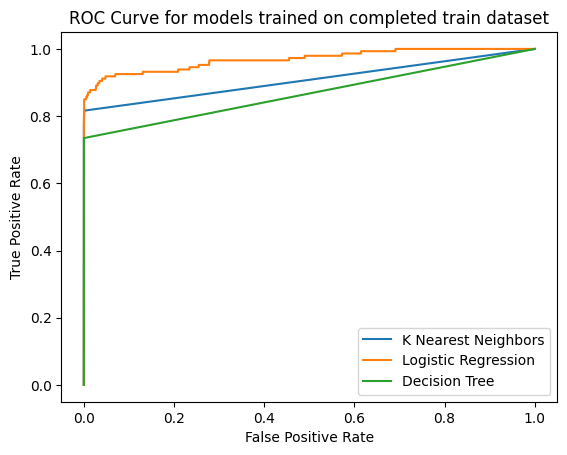

In [45]:
plt.plot(results_comp_set[5][0], results_comp_set[6][0], label='K Nearest Neighbors')
plt.plot(results_comp_set[5][1], results_comp_set[6][1], label='Logistic Regression')
plt.plot(results_comp_set[5][2], results_comp_set[6][2], label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for models trained on completed train dataset")
plt.legend()
plt.show()

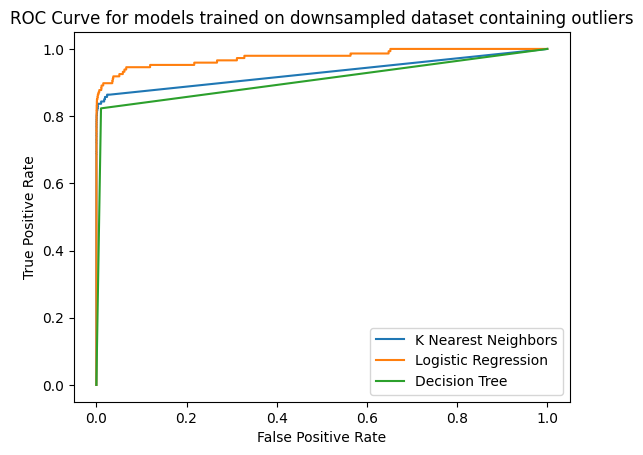

In [46]:
plt.plot(results_outliers[5][0], results_outliers[6][0], label='K Nearest Neighbors')
plt.plot(results_outliers[5][1], results_outliers[6][1], label='Logistic Regression')
plt.plot(results_outliers[5][2], results_outliers[6][2], label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for models trained on downsampled dataset containing outliers")
plt.legend()
plt.show()

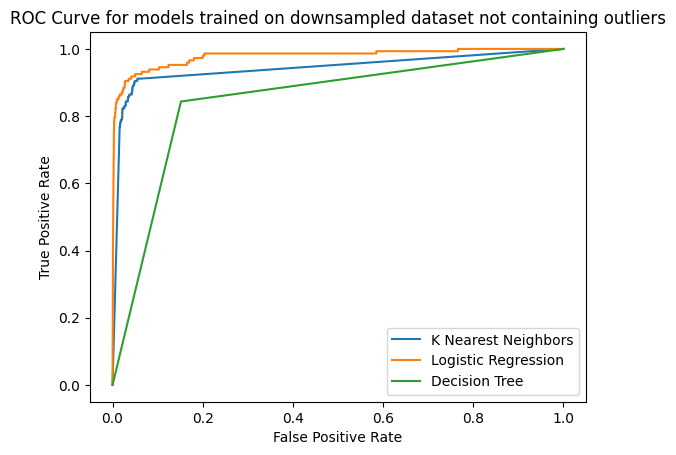

In [47]:
plt.plot(results_no_outliers[5][0], results_no_outliers[6][0], label='K Nearest Neighbors')
plt.plot(results_no_outliers[5][1], results_no_outliers[6][1], label='Logistic Regression')
plt.plot(results_no_outliers[5][2], results_no_outliers[6][2], label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for models trained on downsampled dataset not containing outliers")
plt.legend()
plt.show()

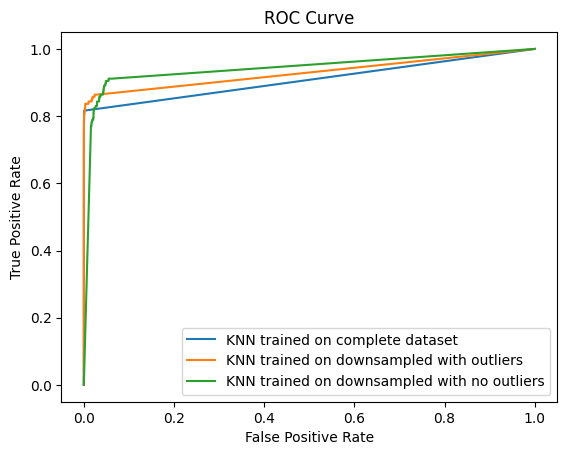

In [48]:
plt.plot(results_comp_set[5][0], results_comp_set[6][0], label='KNN trained on complete dataset')
plt.plot(results_outliers[5][0], results_outliers[6][0], label='KNN trained on downsampled with outliers')
plt.plot(results_no_outliers[5][0], results_no_outliers[6][0], label='KNN trained on downsampled with no outliers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

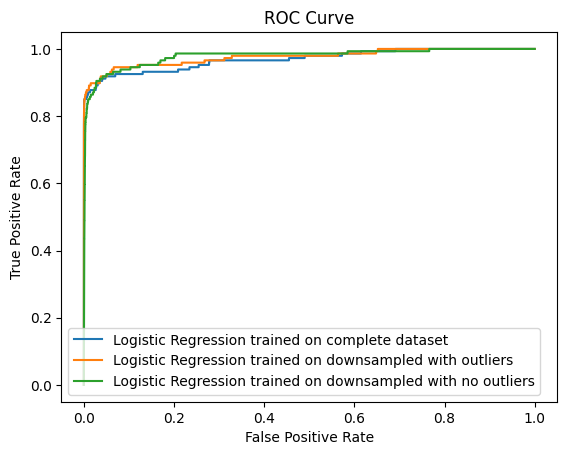

In [49]:
plt.plot(results_comp_set[5][1], results_comp_set[6][1], label='Logistic Regression trained on complete dataset')
plt.plot(results_outliers[5][1], results_outliers[6][1], label='Logistic Regression trained on downsampled with outliers')
plt.plot(results_no_outliers[5][1], results_no_outliers[6][1], label='Logistic Regression trained on downsampled with no outliers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

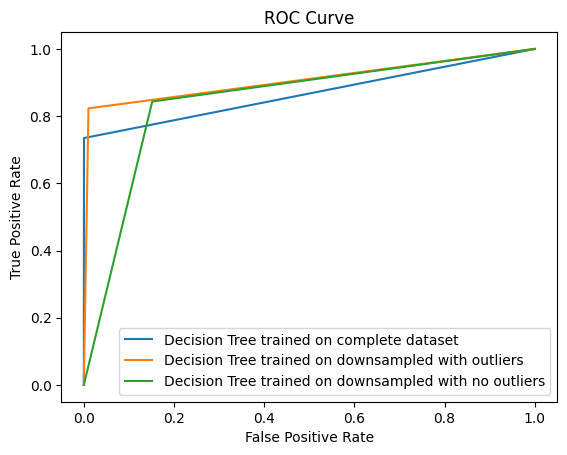

In [50]:
plt.plot(results_comp_set[5][2], results_comp_set[6][2], label='Decision Tree trained on complete dataset')
plt.plot(results_outliers[5][2], results_outliers[6][2], label='Decision Tree trained on downsampled with outliers')
plt.plot(results_no_outliers[5][2], results_no_outliers[6][2], label='Decision Tree trained on downsampled with no outliers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()